# Класифікація. Лабораторна робота №2.

## 1. Імпортуємо необхідні бібліотеки


In [235]:
import pandas as pd
import string
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

## 2. Відрикриваємо dataset і переглядаємо його в табличному вигляді


In [236]:
products = pd.read_csv("./amazon_baby.csv")
products

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion not worth keeping. I also ordered someImse Vimse Cloth Wipes-Ocean Blue-12 countwhich are larger, had a nicer, softer texture and just seemed higher quality. I use cloth wipes for hands and faces and have been usingThirsties 6 Pack Fab Wipes, Boyfor about 8 months now and need to replace them because they are starting to get rough and have had stink issues for a while that stripping no longer handles.",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love planet wise bags and now my wipe holder. it keps my osocozy wipes moist and does not leak. highly recommend it.,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it looks...fit the full size bed perfectly...would recommend to anyone looking for this type of quilt,5
3,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,"This is a product well worth the purchase. I have not found anything else like this, and it is a positive, ingenious approach to losing the binky. What I love most about this product is how much ownership my daughter has in getting rid of the binky. She is so proud of herself, and loves her little fairy. I love the artwork, the chart in the back, and the clever approach of this tool.",5
4,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,"All of my kids have cried non-stop when I tried to ween them off their pacifier, until I found Thumbuddy To Love's Binky Fairy Puppet. It is an easy way to work with your kids to allow them to understand where their pacifier is going and help them part from it.This is a must buy book, and a great gift for expecting parents!! You will save them soo many headaches.Thanks for this book! You all rock!!",5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Shaped Pendant (Smokey Black),"Such a great idea! very handy to have and look really cool too, not to mention great for baby's gums to help reduce the pain of teething!",5
183527,Baby Teething Necklace for Mom Pretty Donut Shaped Pendant (Smokey Black),"This product rocks! It is a great blend of function and fashion. Aside from the unique concept of having something easily accessible and cool for baby to play and soothe themselves as cool accessory for mom, I probably like most the care in the quality of the product in that it is BPA, PVC free, latex and lead-free and dishwasher friendly as a bonus.",5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids....I know this Company and its great in quality...,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, BPA and Phthalate Free - FREE Recipe E-book - Silicone Storage Container with Lid for Homemade Baby Food - 9 Easy-Out Portions - Lifetime Guarantee - Purple","I am extremely happy with this product. I have been searching for a product like this for a long time and just not found the right one. I am a mum who is very into my organic products and unllike many others I have looked at, The Tutti Bimbi Freezer Tray is also BPA and phthalates free. The bright packaging and the ability to choose my colour attracted me to the listing and the fact that I can prepare 9 meals with a very generous portion size for my baby at one time is a massive advantage to me as a working mum. I can freeze the tray easily as it comes with a very easy clip on lid that also protects from freezer burn. I have found I can also put the baby food tray in the dishwasher fine. I would strongly recommend the Tutti Bimbi Baby Food Freezer Tray to any parent like myself who is looking for an easy way to make baby weaning food at home.",5


## 3. Підготуємо текст відгуку для подальшого аналізу


In [237]:
# Заміняємо всі NaN review рядки на пусті рядки
products.review = products.review.fillna("")
# Приводимо review рядки до типу str
products.review = products.review.astype(str)
# Нормалізуємо кожний рядок: прибираємо символи пунктуації, приводимо до нижнього регістру
def normalize(review):
    for i in string.punctuation:
        review = review.replace(i, "")
    return review.lower()

products.review = products.review.apply(normalize)

## 4. Проведемо аналіз та виявимо які продукти частіше зустрічаються у відгуках


In [238]:
products.name.describe()

count                               183213
unique                               32417
top       Vulli Sophie the Giraffe Teether
freq                                   785
Name: name, dtype: object

## 5. Вивчимо найбільш популярний товар


In [239]:
# Виділимо рядки з цим товаром
giraffe_reviews = products[products.name == "Vulli Sophie the Giraffe Teether"].copy()
giraffe_reviews

,name,review,rating
34313,Vulli Sophie the Giraffe Teether,he likes chewing on all the parts especially the head and the ears it has helped when he has been cranky because of teething great purchase,5
34314,Vulli Sophie the Giraffe Teether,my son loves this toy and fits great in the diaper bag also very easy to clean just run right under the water seems to help him when he is getting a tooth,5
34315,Vulli Sophie the Giraffe Teether,there really should be a large warning on the box sheesh in 2011 with so many anaphylactic latex allergies and latex being an allergy that is caused by repeated exposure why in the world would someone think an all latex teether was a good idea for a baby this baby teether could have quite easily killed mommy and there was no warning on the packaging that is made of latex,1
34316,Vulli Sophie the Giraffe Teether,all the moms in my moms group got sophie for their babies so i wondered if there was something to the hype and got one too my daughter loves sophie kids really do love this thing if we heaven forbid ever lost sophie id have to run out and buy another one,5
34317,Vulli Sophie the Giraffe Teether,i was a little skeptical on whether sophie was going to be worth the money but after it arrived today i am very happy that i bought her my is almost 6 months old and is getting his two bottom teeth and he has not put her down all day he even carried her in his hands for 20 minutes while i shopped with him in the bjorn everything about this toy is wonderful even the squeak is not like some of those annoying squeaker toys out there if you are thinking about rather or not to buy sophie take it from me and buy her you will not be disappointed,5
...,...,...,...
159649,Vulli Sophie the Giraffe Teether,my baby loves her sophie chew toy she can chew on all sides and the feet it squeaks too provides hours of fun for my little one,5
159650,Vulli Sophie the Giraffe Teether,sophie the giraffe was a big hit at the baby shower my daughter knew all about sophies attributes and loved receiving her as a baby gift,5
159651,Vulli Sophie the Giraffe Teether,quick shipping and perfect product i would purchase again very satisfied i bought this for my daughter in law for our baby to be baby shower she loves it,5
159652,Vulli Sophie the Giraffe Teether,my baby who is currently teething love his sophie i little bit expensive for a chew toy but it does its job,5


<Axes: ylabel='rating'>

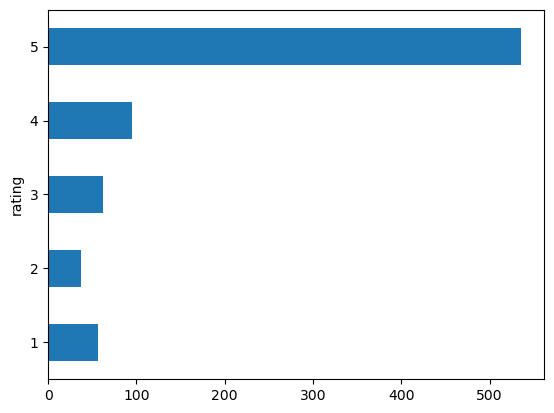

In [240]:
# Знаходимо кількість відгуків по цьому товару
len(giraffe_reviews) #785
# Аналізуємо оцінки
giraffe_reviews.rating.value_counts().sort_index().plot(kind="barh")

## 6. Подивимось на оцінки всіх товарів


In [241]:
products.rating.describe()

count    183531.000000
mean          4.120448
std           1.285017
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

## 7. Визначаємо позитивні та негативні відгуки

In [268]:
# Ігноруємо відгуки з оцінкою 3
products = products[products.rating != 3]
# Додаємо новий стовпчик і помічаємо у ньому позитивні відгуки як 1 (приводимо boolean до int)
products["sentiment"] = products.rating >= 4
products.sentiment = products.sentiment.astype(int)
products

,name,review,rating,sentiment,love_count,wow_count
1,Planetwise Wipe Pouch,it came early and was not disappointed i love planet wise bags and now my wipe holder it keps my osocozy wipes moist and does not leak highly recommend it,5,1,1,0
2,Annas Dream Full Quilt with 2 Shams,very soft and comfortable and warmer than it looksfit the full size bed perfectlywould recommend to anyone looking for this type of quilt,5,1,0,0
3,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,this is a product well worth the purchase i have not found anything else like this and it is a positive ingenious approach to losing the binky what i love most about this product is how much ownership my daughter has in getting rid of the binky she is so proud of herself and loves her little fairy i love the artwork the chart in the back and the clever approach of this tool,5,1,3,0
4,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,all of my kids have cried nonstop when i tried to ween them off their pacifier until i found thumbuddy to loves binky fairy puppet it is an easy way to work with your kids to allow them to understand where their pacifier is going and help them part from itthis is a must buy book and a great gift for expecting parents you will save them soo many headachesthanks for this book you all rock,5,1,1,0
5,Stop Pacifier Sucking without tears with Thumbuddy To Love's Binky Fairy Puppet and Adorable Book,when the binky fairy came to our house we didnt have any special gift and book to help explain to her about how important it is to stop using a pacifier this book does a great job to help prepare your child for the loss of their favorite item the doll is adorable and we made lots of cute movies with the binky fairy telling our daughter about what happens when the binky fairy comes i would highly recommend this product for any parent trying to break the pacifier or thumb sucking habit,5,1,0,0
...,...,...,...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Shaped Pendant (Smokey Black),such a great idea very handy to have and look really cool too not to mention great for babys gums to help reduce the pain of teething,5,1,0,0
183527,Baby Teething Necklace for Mom Pretty Donut Shaped Pendant (Smokey Black),this product rocks it is a great blend of function and fashion aside from the unique concept of having something easily accessible and cool for baby to play and soothe themselves as cool accessory for mom i probably like most the care in the quality of the product in that it is bpa pvc free latex and leadfree and dishwasher friendly as a bonus,5,1,0,0
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),this item looks great and cool for my kidsi know this company and its great in quality,5,1,0,0
183529,"Baby Food Freezer Tray - Bacteria Resistant, BPA and Phthalate Free - FREE Recipe E-book - Silicone Storage Container with Lid for Homemade Baby Food - 9 Easy-Out Portions - Lifetime Guarantee - Purple",i am extremely happy with this product i have been searching for a product like this for a long time and just not found the right one i am a mum who is very into my organic products and unllike many others i have looked at the tutti bimbi freezer tray is also bpa and phthalates free the bright packaging and the ability to choose my colour attracted me to the listing and the fact that i can prepare 9 meals with a very generous portion size for my baby at one time is a massive advantage to me as a working mum i can freeze the tray easily as it comes with a very easy clip on lid that also protects from freezer burn i have found i can also put the baby food tray in the dishwasher fine i would strongly recommend the tutti bimbi baby food freezer tray to any parent like myself who is looking for an easy way to make baby weaning food at home,5,1,0,0


## 8. Будуємо модель (класифікатор на базі логістичної регресії)


In [243]:
X = products.review # Вхідні дані - тексти відгуків
y = products.sentiment # Цільова зміна - 1 (позитивний), 0 (негативний)

# Проводимо розділення на тренувальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [244]:
# Будуємо словник на основі відгуків

# Створюємо екземпляр класу CountVectorizer
vect = CountVectorizer()
# Аналізуємо всі відгуки в тренувальний вибірці: знаходимо унікальні слова, запам'ятовуємо в словнику
vect.fit(X_train)
# Створюємо терм-документну матрицю (матриця, що описує частоту термінів в кожному документі (відгуку) колекції; розмірність - кількість документів x кількість слів)
X_train_dtm = vect.transform(X_train)

In [245]:
#Створюємо та навчаємо модель

# Векторизуємо тестові дані - створюємо терм-документну матрицю для тестових даних
X_test_dtm = vect.transform(X_test)
# Створюємо модель логістичної регресії і навчаємо її на тренувальних даних
sentiment_model = LogisticRegression(max_iter=1000).fit(X_train_dtm, y_train)

In [246]:
# Передбачення та оцінка якості моделі

# Передбачення
predicted = sentiment_model.predict(X_test_dtm)
predicted_probability = sentiment_model.predict_proba(X_test_dtm)[:, 1]
# Оцінка якості
print(f"Accuracy: {metrics.accuracy_score(y_test, predicted)}") # accuracy - % вірних передбачень
print(f"ROC AUC: {metrics.roc_auc_score(y_test, predicted_probability)}") #ROC AUC - якість відділення позитивних від негативних на всіх порогах

Accuracy: 0.9325657401577164
ROC AUC: 0.9548260472659501


# 9. Використаємо отриману модель для передбачення про товар giraffe


In [247]:
# Векторизуємо відгуки
giraffe_vect_dtm = vect.transform(giraffe_reviews.review)
# Передбачаємо класи\ймовірність
giraffe_reviews["predicted_sentiment"] = sentiment_model.predict(giraffe_vect_dtm)
giraffe_reviews["sentiment_proba"] = sentiment_model.predict_proba(giraffe_vect_dtm)[:, 1]

In [248]:
# Сортуємо за зменшенням передбачених значень
giraffe_reviews = giraffe_reviews.sort_values("predicted_sentiment", ascending=False)
giraffe_reviews

,name,review,rating,predicted_sentiment,sentiment_proba
159653,Vulli Sophie the Giraffe Teether,i know several baits that are enjoying the soft flexible sophie giraffe no wonder she made it to the top baby products,5,1,0.954283
35080,Vulli Sophie the Giraffe Teether,despite all theses pretty reviews i wish i could know why my son didnt like it i bought 2 of them the first when he was 5 months old and i thought i might introduced it early later and because my neighbor girl kept biting it when she came and they refused to take it my wife cleaned it in the dishwasher then i had to get him a new one when he was 8 months old unfortunately he didnt like either so i quite,2,1,0.663709
35079,Vulli Sophie the Giraffe Teether,it looks not good as expected but it useful it is good for teeth and good quality i like it,4,1,0.963817
35078,Vulli Sophie the Giraffe Teether,this is a great toy for teething babies we have one for each and they both love it what more can you say,5,1,0.995561
35077,Vulli Sophie the Giraffe Teether,i cant say enough about how much i love this my 3 month old loves this toy so much once she gets her little fingers wrapped around it she will not let it go it goes everywhere with us im thinking i need to buy a 2nd one for nanas house id never heard of sophie before my 2nd pregnancy and once i saw it in a magazine i knew i had to have it the price seems a little high for a teething toy but once my daughter saw it and started going crazy for it i knew it was well worth it,5,1,0.998975
...,...,...,...,...,...
34361,Vulli Sophie the Giraffe Teether,with only a few days worth of minimal play i noticed that the spots on the toy were starting to disappear i licked my fingertip and gently wiped at the paint sure enough it came right off i dont care if the paint is natural i still dont want my baby to ingest iti tried to write to the company that manufactures the product about this defect and i never even heard back from them they apparently dont care about customer service or the quality of their productsthis is a horrible toy especially considering how expensive it is,1,0,0.027864
34339,Vulli Sophie the Giraffe Teether,i cant see how this product can be safe for children color coating on mine has been peeling off from the first day i got it ive shopped from amazon for many years and usually love the products i purchase but this is not just about me not liking it this is a much bigger problem it is about the safety of my baby ill not recommend this product to anybody please do not buy it,1,0,0.035584
35066,Vulli Sophie the Giraffe Teether,i heard so many good reviews about this product and decided i had to try it out with my daughter when i first searched it and saw the price i was astonished wow thats pretty expensive but it sure must be worth it with all the people that have bought them so i gave in and ordered it not wanting to miss out on this great new teething toyi must have bought a different version the toy i received is of no higher quality than a dog toy you would buy at the dollar store a 3 month old would not know the difference its soft rubber so its easy on her gums and she likes to chew on the ears and bottom of sophie not even 10 minutes after i introduced the toy to my daughter the coloring started to peel off its head thats not really safe if you ask me i wouldnt want my baby ingesting plastic peeling i pulled off the part that started peeling though and kept a close eye on it so far the peeling has stopped also my baby loves the squeaking aspect but our dogs also pep up every time they hear it i know that no matter how hard i try to prevent it sooner or later sophie will meet a sad demise as a dog toyneedless to say the product did not live up to my expectations even though my baby likes it just fine it wasnt worth the money,3,0,0.057148
35072,Vulli Sophie the Giraffe Teether,i recently ordered this as a gift and compared the this one to the one my son has and wow u can tell its fake the serial number is ha

In [249]:
# Поглянемо на найкращий відгук
giraffe_reviews.review.iat[0]

'i know several baits that are enjoying the soft flexible sophie giraffe no wonder she made it to the top baby products'

In [250]:
# Поглянемо на наступний відгук
giraffe_reviews.review.iat[1]

'despite all theses pretty reviews i wish i could know why my son didnt like it i bought 2 of them the first when he was 5 months old and i thought i might introduced it early later and because my neighbor girl kept biting it when she came and they refused to take it my wife cleaned it in the dishwasher  then i had to get him a new one when he was 8 months old unfortunately he didnt like either so i quite'

In [251]:
# Знайдемо найнегативніший відгук і наступний за ним
giraffe_reviews.review.iat[-1]

'my baby is more interested in any other teether or clothes i trust online reviews and successfully bought so many interesting toys except this one it is a waste of money'

In [252]:
giraffe_reviews.review.iat[-3]

'i heard so many good reviews about this product and decided i had to try it out with my daughter when i first searched it and saw the price i was astonished wow thats pretty expensive but it sure must be worth it with all the people that have bought them so i gave in and ordered it not wanting to miss out on this great new teething toyi must have bought a different version the toy i received is of no higher quality than a dog toy you would buy at the dollar store a 3 month old would not know the difference its soft rubber so its easy on her gums and she likes to chew on the ears and bottom of sophie not even 10 minutes after i introduced the toy to my daughter the coloring started to peel off its head thats not really safe if you ask me i wouldnt want my baby ingesting plastic peeling i pulled off the part that started peeling though and kept a close eye on it so far the peeling has stopped also my baby loves the squeaking aspect but our dogs also pep up every time they hear it i know

## Домашнє завдання

Будемо використовувати для навчання нової моделі не всі слова із відгуків, а тільки деякі (__№5 'love' - 'wow'__).

1. Створити два нових стовпчики в таблиці, що містять кожний тільки кількість одного слова. Знайти кількість кожного зі слів у відповідних стовпчиках.

In [269]:
products["love_count"] = products.review.apply(lambda x: x.count("love"))
products["wow_count"] = products.review.apply(lambda x: x.count("wow"))

2. Побудувати модель, що використовує кількості тільки двох слів як ознаки.
   Вивести коефіцієнти моделі (ваги слів) - провести інтерпретацію їх значень.


In [254]:
X_1 = products[["love_count", "wow_count"]] # Вхідні дані - кількості слів 'love' та 'wow' в кожному відгуку
y_1 = products["sentiment"] # Цільова зміна - 1 (позитивний), 0(негативний).

# Проводимо розділення на тренувальний та тестовий набори
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [255]:
# Створюємо і навчаємо модель
sentiment_model_1 = LogisticRegression().fit(X_train_1, y_train_1)

In [256]:
# Виводимо коефіцієнти моделі
weights = sentiment_model_1.coef_[0]
print(f"Вага слова 'love': {weights[0]:.3f}")
print(f"Вага слова 'wow': {weights[1]:.3f}")

Вага слова 'love': 1.234
Вага слова 'wow': -0.001


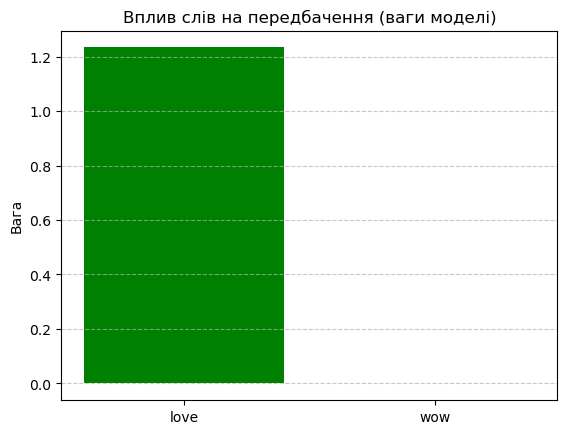

In [257]:
# Візуалізуємо вплив коефіцієнтів слів на передбачення
words = ["love", "wow"]

plt.bar(words, weights, color=['green', 'red'])
plt.title("Вплив слів на передбачення (ваги моделі)")
plt.ylabel("Вага")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Інтерпретація значень коефіцієнтів
1. `love_count` має сильний позитивний вплив; чим більше слово __'love'__ зустрічається у відгуку, тим вища ймовірність, що він буде класифікований як позитивний.
2. `wow_count` має майже нульовий або слабкий негативний вплив; слово __'wow'__ не дає суттєвої інформації для класифікації, або навіть трохи зменшує ймовірність позитивного відгуку; значення дуже маленьке, тому скоріш за все модель його ігнорує.

3. Вивести точність нової моделі, порівняти з точністю моделі, що побудована на всіх словах.


In [258]:
# Передбачення та оцінка якості моделі

# Передбачення
predicted_1 = sentiment_model_1.predict(X_test_1)
predicted_probability_1 = sentiment_model_1.predict_proba(X_test_1)[:, 1]

# Оцінка якості та порівняння
print("Sentiment model (based on review text): ")
print(f"Accuracy: {metrics.accuracy_score(y_test, predicted)}")
print(f"ROC AUC: {metrics.roc_auc_score(y_test, predicted_probability)}\n")

print("Sentiment model 1 (based on specific words (love-wow) count): ")
print(f"Accuracy: {metrics.accuracy_score(y_test_1, predicted_1)}")
print(f"ROC AUC: {metrics.roc_auc_score(y_test_1, predicted_probability_1)}")

Sentiment model (based on review text): 
Accuracy: 0.9325657401577164
ROC AUC: 0.9548260472659501

Sentiment model 1 (based on specific words (love-wow) count): 
Accuracy: 0.8418638121795449
ROC AUC: 0.6357582739886355


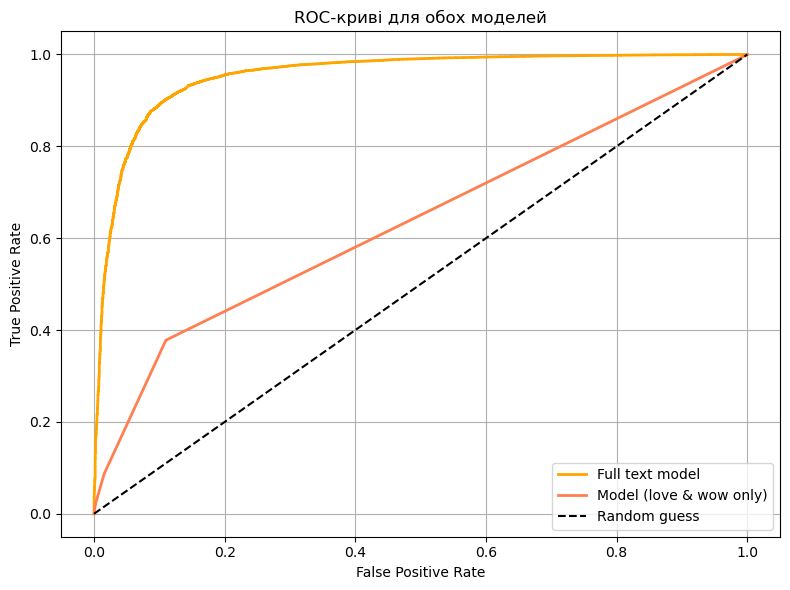

In [259]:
# Створення ROC-кривих для візуалізації якості розподілення моделей
from sklearn.metrics import roc_curve

# Побудова ROC-кривої для моделі на основі повного тексту
fpr_full, tpr_full, _ = roc_curve(y_test, predicted_probability)

# Побудова ROC-кривої для моделі, яка використовує тільки 'love' та 'wow'
fpr_limited, tpr_limited, _ = roc_curve(y_test_1, predicted_probability_1)

# Візуалізація
plt.figure(figsize=(8, 6))
plt.plot(fpr_full, tpr_full, label='Full text model', linewidth=2, color='orange')
plt.plot(fpr_limited, tpr_limited, label='Model (love & wow only)', linewidth=2, color='coral')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')

plt.title("ROC-криві для обох моделей")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


##### Висновки порівняння двох моделей

- **Модель 1 (на основі всього тексту):**
  - Точність (Accuracy): **93%**
  - ROC AUC: **95%**
  - Висока якість класифікації, враховує повний контекст.

- **Модель 2 (на основі лише кількості слів 'love' і 'wow'):**
  - Точність (Accuracy): **84%**
  - ROC AUC: **63%**
  - Просте рішення, легко інтерпретується, але суттєво гірше за точністю.

**Висновок:** модель, що враховує всі слова, значно краще класифікує відгуки. Модель на двох словах може бути використана для базового аналізу або демонстрації впливу окремих термінів.


4. Провести аналіз прогнозів по новій моделі на прикладі іншого товару:
   * зробити фільтрацію та створити нову таблицю тільки з цим товаром;
   * створити в ній новий стовпчик, в який записати передбачені значення по новій моделі;
   * сортувати нову таблицю за спаданням прогнозних значень;
   * вивести по два найкращих і найгірших відгуків.



In [260]:
# Знаходимо третій за популярністю товар
third_popular = products.name.value_counts().index[2]
# Виділяємо рядки з цим товаром
toy_reviews = products[products.name == third_popular].copy()
toy_reviews

,name,review,rating,sentiment,love_count,wow_count
51473,Baby Einstein Take Along Tunes,5 month old likes it seems to keep her attention for a few minutes cute little radio for babies and toddlers,5,1,0,0
51474,Baby Einstein Take Along Tunes,a copy of so many other things out there only one place to grab hold of and i would not buy again,2,0,0,0
51475,Baby Einstein Take Along Tunes,a friend recommended this toy and now i understand why babies love this toy she has been playing with it for months and the songs and lights still entertain her in fact i took it with us at her 6mth shots and it was the only thing that stopped her crying i like that the songs arent obnoxious there are two volume choices and you cant beat the price would recommend to anyone with a young baby,5,1,1,0
51476,Baby Einstein Take Along Tunes,after several friends recommended this little toy i ordered from amazon my son is 7 months old and has been enjoying this since he was born it lights up and plays several tunes he loves it so much if he is fussy we give him this toy and he is immediately quiet it is also very durable it has been dropped and thrown on the ground a lot and is still going i recommend this toy to all of my friends i am considering buying a second one to keep in my diaper bag,5,1,1,0
51477,Baby Einstein Take Along Tunes,after watching my 1 year old nephew play with his toy for a year i was please to recieve one of these as a gist for my baby he is 7 months now and loves his great chewy great to listen to and watch not annoying for mom it is very easy for him to hold and fairly lightweight highly recommended,5,1,1,0
...,...,...,...,...,...,...
52014,Baby Einstein Take Along Tunes,this is a great little music player it has an off switch always important a low volume and a louder volume the music is all instrumental with no strange or annoying voices singing the classical music is all upbeat and my 16 month old loves it he dances to any musiceven commercials and tv programs he loves being able to carry this around,5,1,2,0
52015,Baby Einstein Take Along Tunes,my 7 month old son likes it very much whenever i give it to him he can play for a while,5,1,0,0
52016,Baby Einstein Take Along Tunes,one of the few baby toys available which has very soothing tones the volume options are also perfect high volume is not blaring my daughter loves to look at the vibrant changing colors,5,1,1,0
52017,Baby Einstein Take Along Tunes,my baby loves this toy it has two volume levels so you can control the volume which i greatly appreciate its easy for him to control and he enjoys the music,5,1,1,0


<Axes: ylabel='rating'>

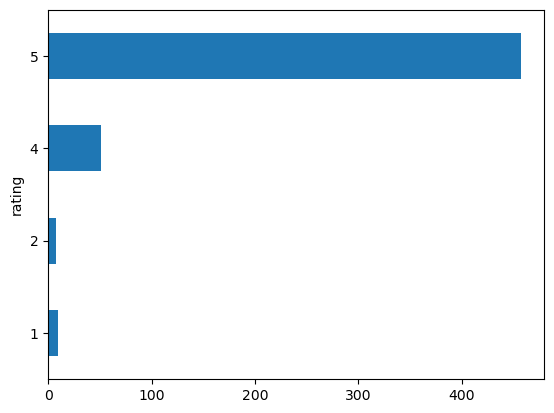

In [261]:
#Аналізуємо оцінки
toy_reviews.rating.value_counts().sort_index().plot(kind="barh")

In [262]:
# Передбачаємо значення по новій моделі
X_test_2 = toy_reviews[['love_count', 'wow_count']]

toy_reviews["predicted_sentiment"] = sentiment_model_1.predict(X_test_2)
toy_reviews["predicted_probability"]  = sentiment_model_1.predict_proba(X_test_2)[:, 1]

In [263]:
# Сортуємо за зменшенням передбачених значень
toy_reviews = toy_reviews.sort_values("predicted_sentiment", ascending=False)
toy_reviews

,name,review,rating,sentiment,love_count,wow_count,predicted_sentiment,predicted_probability
52018,Baby Einstein Take Along Tunes,love this thing it has great music and goes everywhere the lights really catch my 5 month olds attention if you like classical music you should buy it,5,1,1,0,1,0.928503
51473,Baby Einstein Take Along Tunes,5 month old likes it seems to keep her attention for a few minutes cute little radio for babies and toddlers,5,1,0,0,1,0.790884
51474,Baby Einstein Take Along Tunes,a copy of so many other things out there only one place to grab hold of and i would not buy again,2,0,0,0,1,0.790884
51475,Baby Einstein Take Along Tunes,a friend recommended this toy and now i understand why babies love this toy she has been playing with it for months and the songs and lights still entertain her in fact i took it with us at her 6mth shots and it was the only thing that stopped her crying i like that the songs arent obnoxious there are two volume choices and you cant beat the price would recommend to anyone with a young baby,5,1,1,0,1,0.928503
51476,Baby Einstein Take Along Tunes,after several friends recommended this little toy i ordered from amazon my son is 7 months old and has been enjoying this since he was born it lights up and plays several tunes he loves it so much if he is fussy we give him this toy and he is immediately quiet it is also very durable it has been dropped and thrown on the ground a lot and is still going i recommend this toy to all of my friends i am considering buying a second one to keep in my diaper bag,5,1,1,0,1,0.928503
...,...,...,...,...,...,...,...,...
51492,Baby Einstein Take Along Tunes,both my kids love this toy they love anything that plays sound and this plays fun jingly classical tunes and they love to play with it and carry it around the housecar,5,1,3,0,1,0.993512
51491,Baby Einstein Take Along Tunes,both my children have loved this toy it works for a long time and keeps their attention when i needed to distract them would be great and even more useful if the handle was small enough for younger babies to hold,5,1,1,0,1,0.928503
51489,Baby Einstein Take Along Tunes,basically that is what this toy isa little jukebox made for babies it succeeds in this our daughter 6 months old presently adores this thing it has a nice clear sound the music doesnt sound electronic and is also surprisingly not annoying the buttons that trigger the songs are easy for her to press and the whole thing is light enough for her to hold onto or throw when she is ready to move on lol the lights that accompany the songs are great babys love lights and love music so the combo helps to hold my daughters attention anyway this is an inexpensive quality toy and well worth the investment your baby will thank you with hisher smiles and laughterenjoy,5,1,2,0,1,0.978067
51488,Baby Einstein Take Along Tunes,based on previous reviews i bought two of these at the same time one for my grandson and one for his cousin they both absolutely love it they are 2 months apart and each one started noticing watching and hitting it at about 212 months old they love the lights sounds and look of this toy it continues to be a favorite toy for both of them at different ages in development the price is incredibly reasonable so if youre looking for a great toy for young babies this is it,5,1,2,0,1,0.978067


In [264]:
# Виводимо два найкращі відгуки
print(f"Найкращий відгук 1: {toy_reviews.review.iat[0]}")
print(f"Найкращий відгук 2: {toy_reviews.review.iat[1]}")

# Виводимо два найгірші відгуки
print(f"Найгірший відгук 1: {toy_reviews.review.iat[-1]}")
print(f"Найгірший відгук 2: {toy_reviews.review.iat[-2]}")

Найкращий відгук 1: love this thing it has great music and goes everywhere the lights really catch my 5 month olds attention if you like classical music you should buy it
Найкращий відгук 2: 5 month old likes it seems to keep her attention for a few minutes cute little radio for babies and toddlers
Найгірший відгук 1: baby thinks its her ipod  i much prefer the music to some pop tunes  gives an infant an appreciation to excellent music and it takes a beating
Найгірший відгук 2: based on previous reviews i bought two of these at the same time one for my grandson and one for his cousin they both absolutely love it they are 2 months apart and each one started noticing watching and hitting it at about 212 months old they love the lights sounds and look of this toy it continues to be a favorite toy for both of them at different ages in development the price is incredibly reasonable so if youre looking for a great toy for young babies this is it
